In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dsprites

### Large Heads

In [86]:
dir_path="/home/anowak/results/anowak/disentangelemnt/dsprites/multi-task-LH"

In [87]:
task=1
seed=1
data = np.load("{}/{}/{}/test/test_results.npy".format(dir_path, task, seed), allow_pickle=True).item()

In [88]:
[k for k in data.keys() if k.startswith("loss")]

['loss0',
 'loss1',
 'loss2',
 'loss3',
 'loss4',
 'loss5',
 'loss6',
 'loss7',
 'loss8',
 'loss9']

In [89]:
def load_data(dir_path, tasks, seeds):
    res_dir = {"loss{}".format(i):[] for i in range(50)}
    res_dir["total_loss"]=[]
    res_dir.update({"factor_vae":[], "mig":[], "irs":[], "wica":[], "gauss_TC":[], "gauss_WS":[], "MI_score":[], "max_corr":[]})
    res_dir.update({"completeness":[], "disentanglement":[], "informativeness_test":[], "sap_score":[]})
    res_dir.update({"task":[], "seed":[]})
    for task in tasks:
        for seed in seeds:
            try:
                if task !="multi-50-LH":
                    data = np.load("{}/{}/{}/test/test_results.npy".format(dir_path, task, seed), allow_pickle=True).item()
                else:
                    data = np.load("/local/data/anowak/disentangelemnt/multi-task-50-large-heads/multi/{}/test/test_results.npy".format(seed), allow_pickle=True).item()
                
                losses = [k for k in data.keys() if k.startswith("loss")]
                
                for l in losses:
                    if l!="loss_total":
                        res_dir[l].append(data[l][0])
            
                res_dir["total_loss"].append(np.mean([data[l][0] for l in losses]))
                
                for i in range(50):
                    if "loss{}".format(i) not in losses:
                        res_dir["loss{}".format(i)].append(np.nan)
                
                res_dir["factor_vae"].append(data["eval_eval_accuracy"][0])    
                res_dir["mig"].append(data["eval_discrete_mig"][0])
                res_dir["irs"].append(data["eval_IRS"][0])
                res_dir["completeness"].append(data["eval_completeness"][0])
                res_dir["disentanglement"].append(data["eval_disentanglement"][0])
                res_dir["informativeness_test"].append(data["eval_informativeness_test"][0])                
                
                res_dir["wica"].append(data["eval_weighted_ica_measure"][0])
                res_dir["gauss_TC"].append(data["eval_gaussian_total_correlation"][0])                
                res_dir["gauss_WS"].append(data["eval_gaussian_wasserstein_correlation_norm"][0]) 
                res_dir["MI_score"].append(data["eval_mutual_info_score"][0]) 
                res_dir["max_corr"].append(data["eval_max_corr"][0]) 
                if "eval_SAP_score" in data:
                    res_dir["sap_score"].append(data["eval_SAP_score"][0])
                else:
                    res_dir["sap_score"].append(np.nan)
                                            
                
                res_dir["task"].append(task)
                res_dir["seed"].append(seed)
                
            except FileNotFoundError:
                print("No such file or directory: {}/{}/{}/test/test_results.npy".format(dir_path, task, seed))
                for i in range(10):
                    res_dir["loss{}".format(i)].append(np.nan)
                res_dir["total_loss"].append(np.nan)
                res_dir["factor_vae"].append(np.nan)    
                res_dir["mig"].append(np.nan)
                res_dir["irs"].append(np.nan)
                res_dir["completeness"].append(np.nan)
                res_dir["disentanglement"].append(np.nan)
                res_dir["informativeness_test"].append(np.nan)   
                
                res_dir["wica"].append(np.nan)
                res_dir["gauss_TC"].append(np.nan)                
                res_dir["gauss_WS"].append(np.nan) 
                res_dir["MI_score"].append(np.nan) 
                res_dir["max_corr"].append(np.nan) 
                res_dir["sap_score"].append(np.nan)
                res_dir["task"].append(task)
                res_dir["seed"].append(seed)
    return pd.DataFrame.from_dict(res_dir)

In [90]:
dataLH = load_data(dir_path, ["not-trained"]+[i+1 for i in range(10)]+["multi-5","multi-10","multi-20","multi-30","multi-40", "multi-50", "regression"], [1,2,3])

In [115]:
def plot_losses(data, what="total_loss", lims=None, ax=None):
    colors=["gray", "lightgray", "tab:red"]
    
    

    means = data.groupby("task").mean()[[what]]
    stds = data.groupby("task").std()[[what]]
    means["idx"]=means.index
    stds["idx"]=stds.index
    xs = np.arange(len(means.index))
    
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize=(14,7))
    ax.bar(xs[0], means[means["idx"]=="not-trained"][what], yerr=stds[stds["idx"]=="not-trained"][what], color=colors[0], label="not-trained")
    for i in range(10):
        ax.bar(xs[i+1], means[means["idx"]==i+1][what], yerr=stds[stds["idx"]==i+1][what], color=colors[1], label="task {}".format(i+1))
    
    for j, m in enumerate([5,10,20,30,40,50]):
        ax.bar(xs[11+j], means[means["idx"]=="multi-{}".format(m)][what], yerr=stds[stds["idx"]=="multi-{}".format(m)][what], color=colors[2], label="multi-{}".format(m))
    
    ax.bar(xs[17], means[means["idx"]=="regression".format(m)][what], yerr=stds[stds["idx"]=="regression".format(m)][what], color="darkgreen", label="regression".format(m))

    ax.set_ylim(lims)
    ax.set_xticks(xs)
    labels = ["task {}".format(x+1) for x in xs]
    labels[0]="not-trained"
    for i in range(10):
        labels[i+1]="task {}".format(i+1)
    for j, m in enumerate([5,10,20,30,40,50]):
        labels[11+j]="multi-{}".format(m) 
    ax.set_xticklabels(labels)
    ax.set_title(what, fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='x', rotation=90)

import matplotlib.patches as mpatches    


def get_vals(data):

    idx_single = []
    for i in range(len(data["task"])):
        row = data["task"].iloc[i]
        if row in range(1,11):
            idx_single.append(i)

    
    data_single = data.iloc[idx_single]
    data_multi10 = data[data["task"]=="multi-10"]   
    data_nt = data[data["task"]=="not-trained"]

def plot_losses_v2(data, what="total_loss", lims=None, ax=None, plot_title=True, ylabel=None, plot_xlabels = True, regression=False, plot_anno=False, loc=2, title=None):
    colors=["gray", "lightgray", "tab:red"]


    idx_single = []
    for i in range(len(data["task"])):
        row = data["task"].iloc[i]
        if row in range(1,11):
            idx_single.append(i)

    
    data_single = data.iloc[idx_single]
    min_single = data_single.groupby("task")[what].mean().min()
    max_single = data_single.groupby("task")[what].mean().max()
    mean_single = data_single[what].mean()
    std_single = data_single[what].std()
    
    data_multi10 = data[data["task"]=="multi-10"]
    mean_multi = data_multi10[what].mean()
    std_multi = data_multi10[what].std()
    min_multi = data_multi10[what].min()
    max_multi = data_multi10[what].max()
    
    data_nt = data[data["task"]=="not-trained"]
    mean_nt = data_nt[what].mean()
    std_nt = data_nt[what].std()
    min_nt = data_nt[what].min()
    max_nt = data_nt[what].max()

    
    if not regression:
        xs = np.arange(6)
    else:
        xs = np.arange(8)
        data_r = data[data["task"]=="regression"]
        mean_r = data_r[what].mean()
        std_r = data_r[what].std()
    
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize=(14,7))
        

    #ax.bar(xs[0], max_nt, color=colors[0], hatch='\\', error_kw = {"capsize":10, "elinewidth":3, "markeredgewidth":3})
    ax.bar(xs[0], mean_nt, yerr=std_nt, color=colors[0], error_kw = {"capsize":10, "elinewidth":3, "markeredgewidth":3})
    #ax.bar(xs[0], min_nt, color=colors[0],  hatch='/', error_kw = {"capsize":10, "elinewidth":3, "markeredgewidth":3})

    
    ax.bar(xs[2], max_single, color=colors[1], label="max", alpha=0.2, hatch='\\', error_kw = {"capsize":10, "elinewidth":3, "markeredgewidth":3})
    ax.bar(xs[2], mean_single, yerr=std_single, color=colors[1],alpha=0.4, label="mean", hatch='x', error_kw = {"capsize":10, "elinewidth":3, "markeredgewidth":3})
    ax.bar(xs[2], min_single, color=colors[1], label="min", hatch='/', error_kw = {"capsize":10, "elinewidth":3, "markeredgewidth":3})
    
    #ax.bar(xs[2], max_multi, color=colors[2], hatch='\\', error_kw = {"capsize":20, "elinewidth":3, "markeredgewidth":3})
    ax.bar(xs[4], mean_multi, yerr=std_multi, color=colors[2], error_kw = {"capsize":10, "elinewidth":3, "markeredgewidth":3})
    #ax.bar(xs[4], min_multi, color=colors[2],  hatch='/', error_kw = {"capsize":20, "elinewidth":3, "markeredgewidth":3})
    
    if regression:
        ax.bar(xs[6],mean_r, yerr= std_r, color="tab:blue", error_kw={"capsize":10, "elinewidth":3, "markeredgewidth":3})
    
    for i, p in enumerate(ax.patches):
        if plot_anno or ((not plot_anno) and (i not in [1,3])):
        
            w = p.get_width()
            h = p.get_height()
            x = p.get_x()+w/2


            ax.hlines(h, xmin=x-w*0.5, xmax=x+1.5*w )
            if i%5 in [1,2,3]:
                ax.annotate('{:.3f}'.format(h),
                                xy=(x + 1.5*0.7*w+(i-1)*0.15*w, h),
                                xytext=(-1, 3),  # 3 points vertical offset
                                textcoords="offset points",
                                ha='center', va='bottom', size=25)
            else:
                ax.annotate('{:.3f}'.format(h),
                xy=(x + 1.5*0.7*w, h),
                xytext=(-1, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', size=25)
        

    
   # for i in range(10):
   #     ax.bar(xs[i+1], means[means["idx"]==i+1][what], yerr=stds[stds["idx"]==i+1][what], color=colors[1], label="task {}".format(i+1))
    
   # for j, m in enumerate([5,10,20,30,40,50]):
   #     ax.bar(xs[11+j], means[means["idx"]=="multi-{}".format(m)][what], yerr=stds[stds["idx"]=="multi-{}".format(m)][what], color=colors[2], label="multi-{}".format(m))
    if what == "informativeness_test":
        ax.set_ylim((0, 0.55))
        
    if what == "completeness":
        ax.set_yticks([0.0, 0.05, 0.10, 0.15, 0.18])
    
    if lims is not None:
        ax.set_ylim(lims[what])

    if plot_xlabels:
        if not regression:
            ax.set_xticks([xs[0], xs[2], xs[4]])
            labels=["random", "single", "mutli"]
            ax.set_xticklabels(labels, fontsize=40)
        else:
            ax.set_xticks([xs[0], xs[2], xs[4], xs[6]])
            labels=["random", "single","multi-head", "one-head"]
            ax.set_xticklabels(labels, fontsize=40)
    else:
        ax.set_xticks([])

    
    if plot_title:
        if title is not None:
            ax.set_title(title, fontsize=50)
        else:
            if what == "total_loss":
                ax.set_title("MSE loss", fontsize=50)
            elif what == "informativeness_test":
                ax.set_title("informativeness", fontsize=50)
            elif what == "factor_vae":
                ax.set_title("factor VAE", fontsize=50)
            elif what == "sap_score":
                ax.set_title("SAP score", fontsize=50)
            elif what == "mig":
                ax.set_title("MIG", fontsize=50)  
            else:
                ax.set_title(what, fontsize=50)
        #ax.set_title(what, fontsize=50)
    ax.tick_params(axis='y', which='major', labelsize=30)
    if ylabel is not None:
        ax.set_ylabel(ylabel, fontsize=50)
    ax.tick_params(axis='x', rotation=90) 
    
    
    circ1 = mpatches.Patch(facecolor="white", hatch='\\',label='max value')
    circ2= mpatches.Patch(facecolor="white",hatch='/',label='mean')
    circ3 = mpatches.Patch(facecolor="white", hatch='x',label='min value')

    

    ax.legend(prop={'size': 25}, loc=loc)
    

def plot_all_losses(data, whats=["mig", "irs", "factor_vae", "completeness", "disentanglement", "informativeness_test"],
                   lims=None, cols=3, figsize=(30,10)):
    rows = len(whats)//cols
    if rows*cols < len(whats):
        rows = rows+1
    
    fig, ax = plt.subplots(rows, cols, figsize=figsize,squeeze=False)
    plt.subplots_adjust(hspace=0.5)
    for i in range(rows):
        for j in range(cols):
            plot_losses(data, whats[i*cols+j], lims=lims, ax= ax[i][j])
            

    plt.show()

    
def plot_all_losses_v2(data,whats=["mig", "factor_vae", "completeness", "disentanglement", "informativeness_test", "sap_score"],
                      lims=None, cols=6, figsize=(60,10), plot_title=True, ylabel=None, plot_xlabels = True, ax=None, row=0, regression=False):
    
   
    if ax is None:
        fig, ax = plt.subplots(1, cols, figsize=figsize,squeeze=False)
        plt.subplots_adjust(hspace=0.5)

    for j in range(cols):
        if j == 0:
            plot_losses_v2(data, whats[j], lims=lims, ax= ax[row][j], plot_title=plot_title, ylabel=ylabel, plot_xlabels = plot_xlabels, regression=regression)
        else:
            plot_losses_v2(data, whats[j], lims=lims, ax= ax[row][j], plot_title=plot_title, ylabel=None, plot_xlabels = plot_xlabels, regression=regression)




def plot_all(data1, data2, lims={"mig":(0, 0.059), "factor_vae":(0,0.62), "completeness":(0, 0.135), "disentanglement":(0, 0.15), "informativeness_test":(0, 0.58),
                                "sap_score":(0, 0.06)}):
    fig, ax = plt.subplots(2, 6, figsize=(50,21),squeeze=False)
    plt.subplots_adjust(hspace=0.1)
    plot_all_losses_v2(data1, ylabel="dSprites", plot_xlabels=False, ax=ax, row=0, lims=lims)
    plot_all_losses_v2(data2, ylabel="Shapes3D", plot_title=False, ax=ax, row=1, lims=lims)
    plt.show()
    
    

def plot_all3(data1, data2, data3, lims={"mig":(0, 0.111), "factor_vae":(0,0.86), "completeness":(0, 0.185), "disentanglement":(0, 0.21), "informativeness_test":(0, 0.68), "sap_score":(0, 0.06)}, regression=False):
    fig, ax = plt.subplots(3, 6, figsize=(50,31),squeeze=False)
    plt.subplots_adjust(hspace=0.1)
    plot_all_losses_v2(data1, ylabel="dSprites", plot_xlabels=False, ax=ax, row=0, lims=lims, regression=regression)
    plot_all_losses_v2(data2, ylabel="Shapes3D", plot_xlabels=False, plot_title=False, ax=ax, row=1, lims=lims, regression=regression)
    plot_all_losses_v2(data3, ylabel="MPI3D",  plot_title=False, ax=ax, row=2, lims=lims, regression=regression)
    plt.show()    
    
    
    

In [92]:
def plot_multi(data, what="total_loss", lims=None, ax=None, plot_title=True, ylabel=None, plot_xlabels=False):
    colors=["gray", "lightgray", "tab:red"]
    
    


    idx_multi = []
    for i in range(len(data["task"])):
        row = data["task"].iloc[i]
        if row in ["multi-5", "multi-10", "multi-20", "multi-30", "multi-40", "multi-50"]:
            idx_multi.append(i)
        
    datam = data.iloc[idx_multi]


    means = datam.groupby("task").mean()[[what]]
    stds = datam.groupby("task").std()[[what]]
    means["idx"]=means.index
    stds["idx"]=stds.index

    xs = np.arange(6)
    
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize=(14,7))
    for j, m in enumerate([5,10,20,30,40,50]):
        ax.bar(xs[j], means[what].values[j], yerr=stds[what].values[j], color=colors[2])

    if lims is not None:
        ax.set_ylim(lims[what])
    ax.set_xticks(xs)
    labels=[]
    for j, m in enumerate([5,10,20,30,40,50]):
        labels.append("multi-{}".format(m))
    
    if plot_xlabels:
        ax.set_xticklabels(labels)
    else:
        ax.set_xticks([])

    
    
    
    if plot_title:
        if what == "total_loss":
            ax.set_title("MSE loss", fontsize=20)
        elif what == "informativeness_test":
            ax.set_title("informativeness")
        else:
            ax.set_title(what, fontsize=20)
    if ylabel is not None:
        ax.set_ylabel(ylabel, fontsize=50)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='x', rotation=90)

def plot_all_multi(data,whats=["mig", "factor_vae", "completeness", "disentanglement", "informativeness_test", "sap_score"],
                      lims=None, cols=6, figsize=(60,10), plot_title=True, ylabel=None, plot_xlabels = True, ax=None, row=0):
    
   
    if ax is None:
        fig, ax = plt.subplots(1, cols, figsize=figsize,squeeze=False)
        plt.subplots_adjust(hspace=0.5)

    for j in range(cols):
        if j == 0:
            plot_multi(data, whats[j], lims=lims, ax= ax[row][j], plot_title=plot_title, ylabel=ylabel, plot_xlabels = plot_xlabels)
        else:
            plot_multi(data, whats[j], lims=lims, ax= ax[row][j], plot_title=plot_title, ylabel=None, plot_xlabels = plot_xlabels)


def plot_all_m(data1, data2, lims={"mig":(0, 0.059), "factor_vae":(0,0.62), "completeness":(0, 0.135), "disentanglement":(0, 0.15), "informativeness_test":(0, 0.58)}):
    fig, ax = plt.subplots(2, 5, figsize=(50,21),squeeze=False)
    plt.subplots_adjust(hspace=0.1)
    plot_all_multi(data1, ylabel="dsprites", plot_xlabels=False, ax=ax, row=0, lims=lims)
    plot_all_multi(data2, ylabel="shapes3d", plot_title=False, ax=ax, row=1, lims=lims)
    plt.show()   
    
def plot_all_mm(data1, data2, data3, lims={"mig":(0, 0.059), "factor_vae":(0,0.62), "completeness":(0, 0.135), "disentanglement":(0, 0.17), "informativeness_test":(0, 0.58)}):
    fig, ax = plt.subplots(3, 5, figsize=(50,31),squeeze=False)
    plt.subplots_adjust(hspace=0.1)
    plot_all_multi(data1, ylabel="dsprites", plot_xlabels=False, ax=ax, row=0, lims=lims)
    plot_all_multi(data2, ylabel="shapes3d", plot_xlabels=False, plot_title=False, ax=ax, row=1, lims=lims)
    plot_all_multi(data3, ylabel="mpi3d", plot_title=False, ax=ax, row=2, lims=lims)
    plt.show()       

In [93]:
dir_path="/home/<user>/results/<user>/disentangelemnt/shapes3d/multi-task-LH"
dataLH_shapes3d = load_data(dir_path, ["not-trained"]+[i+1 for i in range(10)]+["multi-5","multi-10","multi-20","multi-30","multi-40", "multi-50","regression" ], [1,2,3])


In [94]:
dir_path="/home/<user>/results/<user>/disentangelemnt/mpi3d_real/multi-task-LH"
dataLH_mpi3d = load_data(dir_path, ["not-trained"]+[i+1 for i in range(10)]+["multi-5","multi-10","multi-20","multi-30","multi-40", "multi-50", "regression"], [1,2,3])


In [95]:
dir_path="/home/<user>/results/<user>/disentangelemnt/dsprites/multi-task-LH"
dataLH = load_data(dir_path, ["not-trained"]+[i+1 for i in range(10)]+["multi-5","multi-10","multi-20","multi-30","multi-40", "multi-50", "regression"], [1,2,3])


In [96]:
def get_table(data, dset_name, what="total_loss"):
    colors=["gray", "lightgray", "tab:red"]


    idx_single = []
    for i in range(len(data["task"])):
        row = data["task"].iloc[i]
        if row in range(1,11):
            idx_single.append(i)

    
    data_single = data.iloc[idx_single]
    min_single = data_single.groupby("task")[what].mean().min()
    max_single = data_single.groupby("task")[what].mean().max()

    i1 = data_single.groupby("task")[what].mean().idxmin()
    i2 = data_single.groupby("task")[what].mean().idxmax()    
    
    print(i1)
    print(i2)
    
    min_std_single = data_single.groupby("task")[what].std().loc[i1]
    max_std_single = data_single.groupby("task")[what].std().loc[i2]    
    
    mean_single = data_single[what].mean()
    std_single = data_single[what].std()
    
    data_multi10 = data[data["task"]=="multi-10"]
    mean_multi = data_multi10[what].mean()
    std_multi = data_multi10[what].std()
    min_multi = data_multi10[what].min()
    max_multi = data_multi10[what].max()
    
    data_nt = data[data["task"]=="not-trained"]
    mean_nt = data_nt[what].mean()
    std_nt = data_nt[what].std()
    min_nt = data_nt[what].min()
    max_nt = data_nt[what].max()


    data_r = data[data["task"]=="regression"]
    mean_r = data_r[what].mean()
    std_r = data_r[what].std()
    
    
    models = ["random", "single-mean", "single-max", "single-min", "multi", "regression"]
    means = [mean_nt, mean_single, max_single, min_single, mean_multi, mean_r]
    stds = [std_nt, std_single, max_std_single, min_std_single, std_multi, std_r]
    
    meann=["$ {0:.2f} \pm {1:.2f} $".format(np.round(m,2), np.round(s,2)) for (m,s) in zip(means, stds)]
    
    frame = pd.DataFrame.from_dict({"model":models, "{}".format(dset_name):meann})
    return frame
    
    

In [97]:
dataLH.columns

Index(['loss0', 'loss1', 'loss2', 'loss3', 'loss4', 'loss5', 'loss6', 'loss7',
       'loss8', 'loss9', 'loss10', 'loss11', 'loss12', 'loss13', 'loss14',
       'loss15', 'loss16', 'loss17', 'loss18', 'loss19', 'loss20', 'loss21',
       'loss22', 'loss23', 'loss24', 'loss25', 'loss26', 'loss27', 'loss28',
       'loss29', 'loss30', 'loss31', 'loss32', 'loss33', 'loss34', 'loss35',
       'loss36', 'loss37', 'loss38', 'loss39', 'loss40', 'loss41', 'loss42',
       'loss43', 'loss44', 'loss45', 'loss46', 'loss47', 'loss48', 'loss49',
       'total_loss', 'factor_vae', 'mig', 'irs', 'wica', 'gauss_TC',
       'gauss_WS', 'MI_score', 'max_corr', 'completeness', 'disentanglement',
       'informativeness_test', 'sap_score', 'task', 'seed'],
      dtype='object')

In [98]:
def get_all_table(dataLH, dataLH_shapes3d, dataLH_mpi3d, what):
    tab1 = get_table(dataLH, "dsprites", what)
    tab2 = get_table(dataLH_shapes3d, "shapes3d", what)
    tab3 = get_table(dataLH_mpi3d, "mpi3d", what)
    tab = tab1.merge(tab2, on="model").merge(tab3, on="model").set_index("model")
    return tab

In [99]:
tab = get_all_table(dataLH, dataLH_shapes3d, dataLH_mpi3d, "sap_score")

9
8
7
2
5
8


In [100]:
print(tab.to_latex(escape=False))

\begin{tabular}{llll}
\toprule
{} &           dsprites &           shapes3d &              mpi3d \\
model       &                    &                    &                    \\
\midrule
random      &  $ 0.00 \pm 0.00 $ &  $ 0.01 \pm 0.01 $ &  $ 0.00 \pm 0.00 $ \\
single-mean &  $ 0.01 \pm 0.01 $ &  $ 0.01 \pm 0.00 $ &  $ 0.01 \pm 0.00 $ \\
single-max  &  $ 0.02 \pm 0.00 $ &  $ 0.01 \pm 0.00 $ &  $ 0.01 \pm 0.00 $ \\
single-min  &  $ 0.00 \pm 0.00 $ &  $ 0.00 \pm 0.00 $ &  $ 0.01 \pm 0.00 $ \\
multi       &  $ 0.01 \pm 0.01 $ &  $ 0.04 \pm 0.01 $ &  $ 0.02 \pm 0.01 $ \\
regression  &  $ 0.02 \pm 0.02 $ &  $ 0.02 \pm 0.01 $ &  $ 0.01 \pm 0.01 $ \\
\bottomrule
\end{tabular}



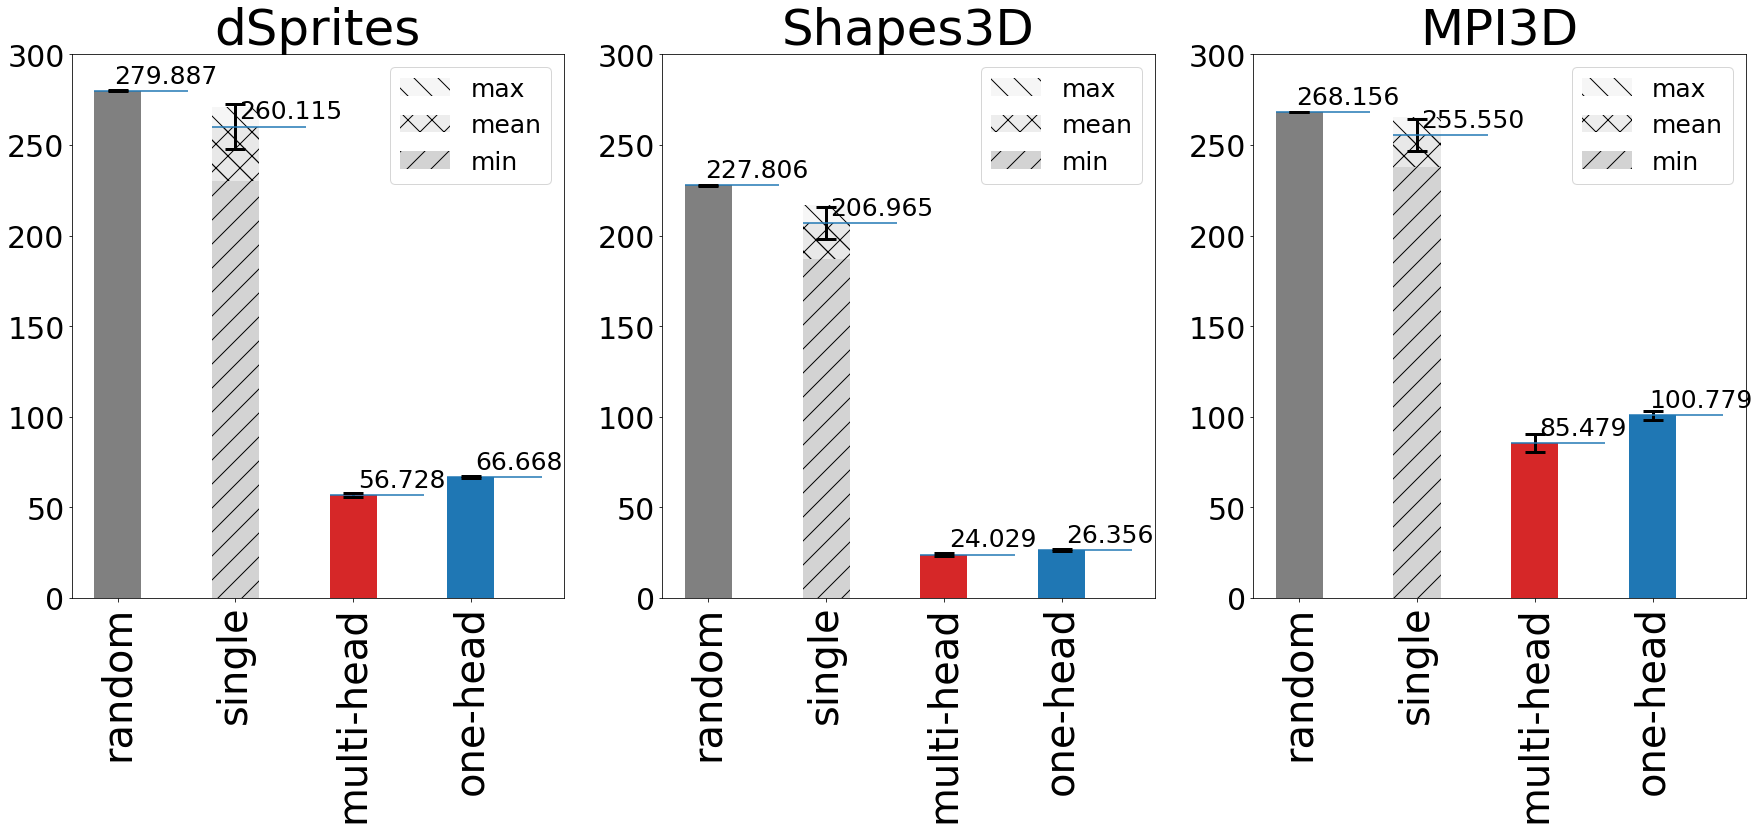

In [116]:
fig, ax = plt.subplots(1,3, figsize=(30,10))
plot_losses_v2(dataLH, regression=True, ax=ax[0], loc=1, lims={"total_loss":(0, 300)}, title="dSprites")
plot_losses_v2(dataLH_shapes3d, regression=True, ax=ax[1], loc=1, lims={"total_loss":(0, 300)}, title="Shapes3D")
plot_losses_v2(dataLH_mpi3d, regression=True, ax=ax[2], loc=1, lims={"total_loss":(0, 300)}, title="MPI3D")

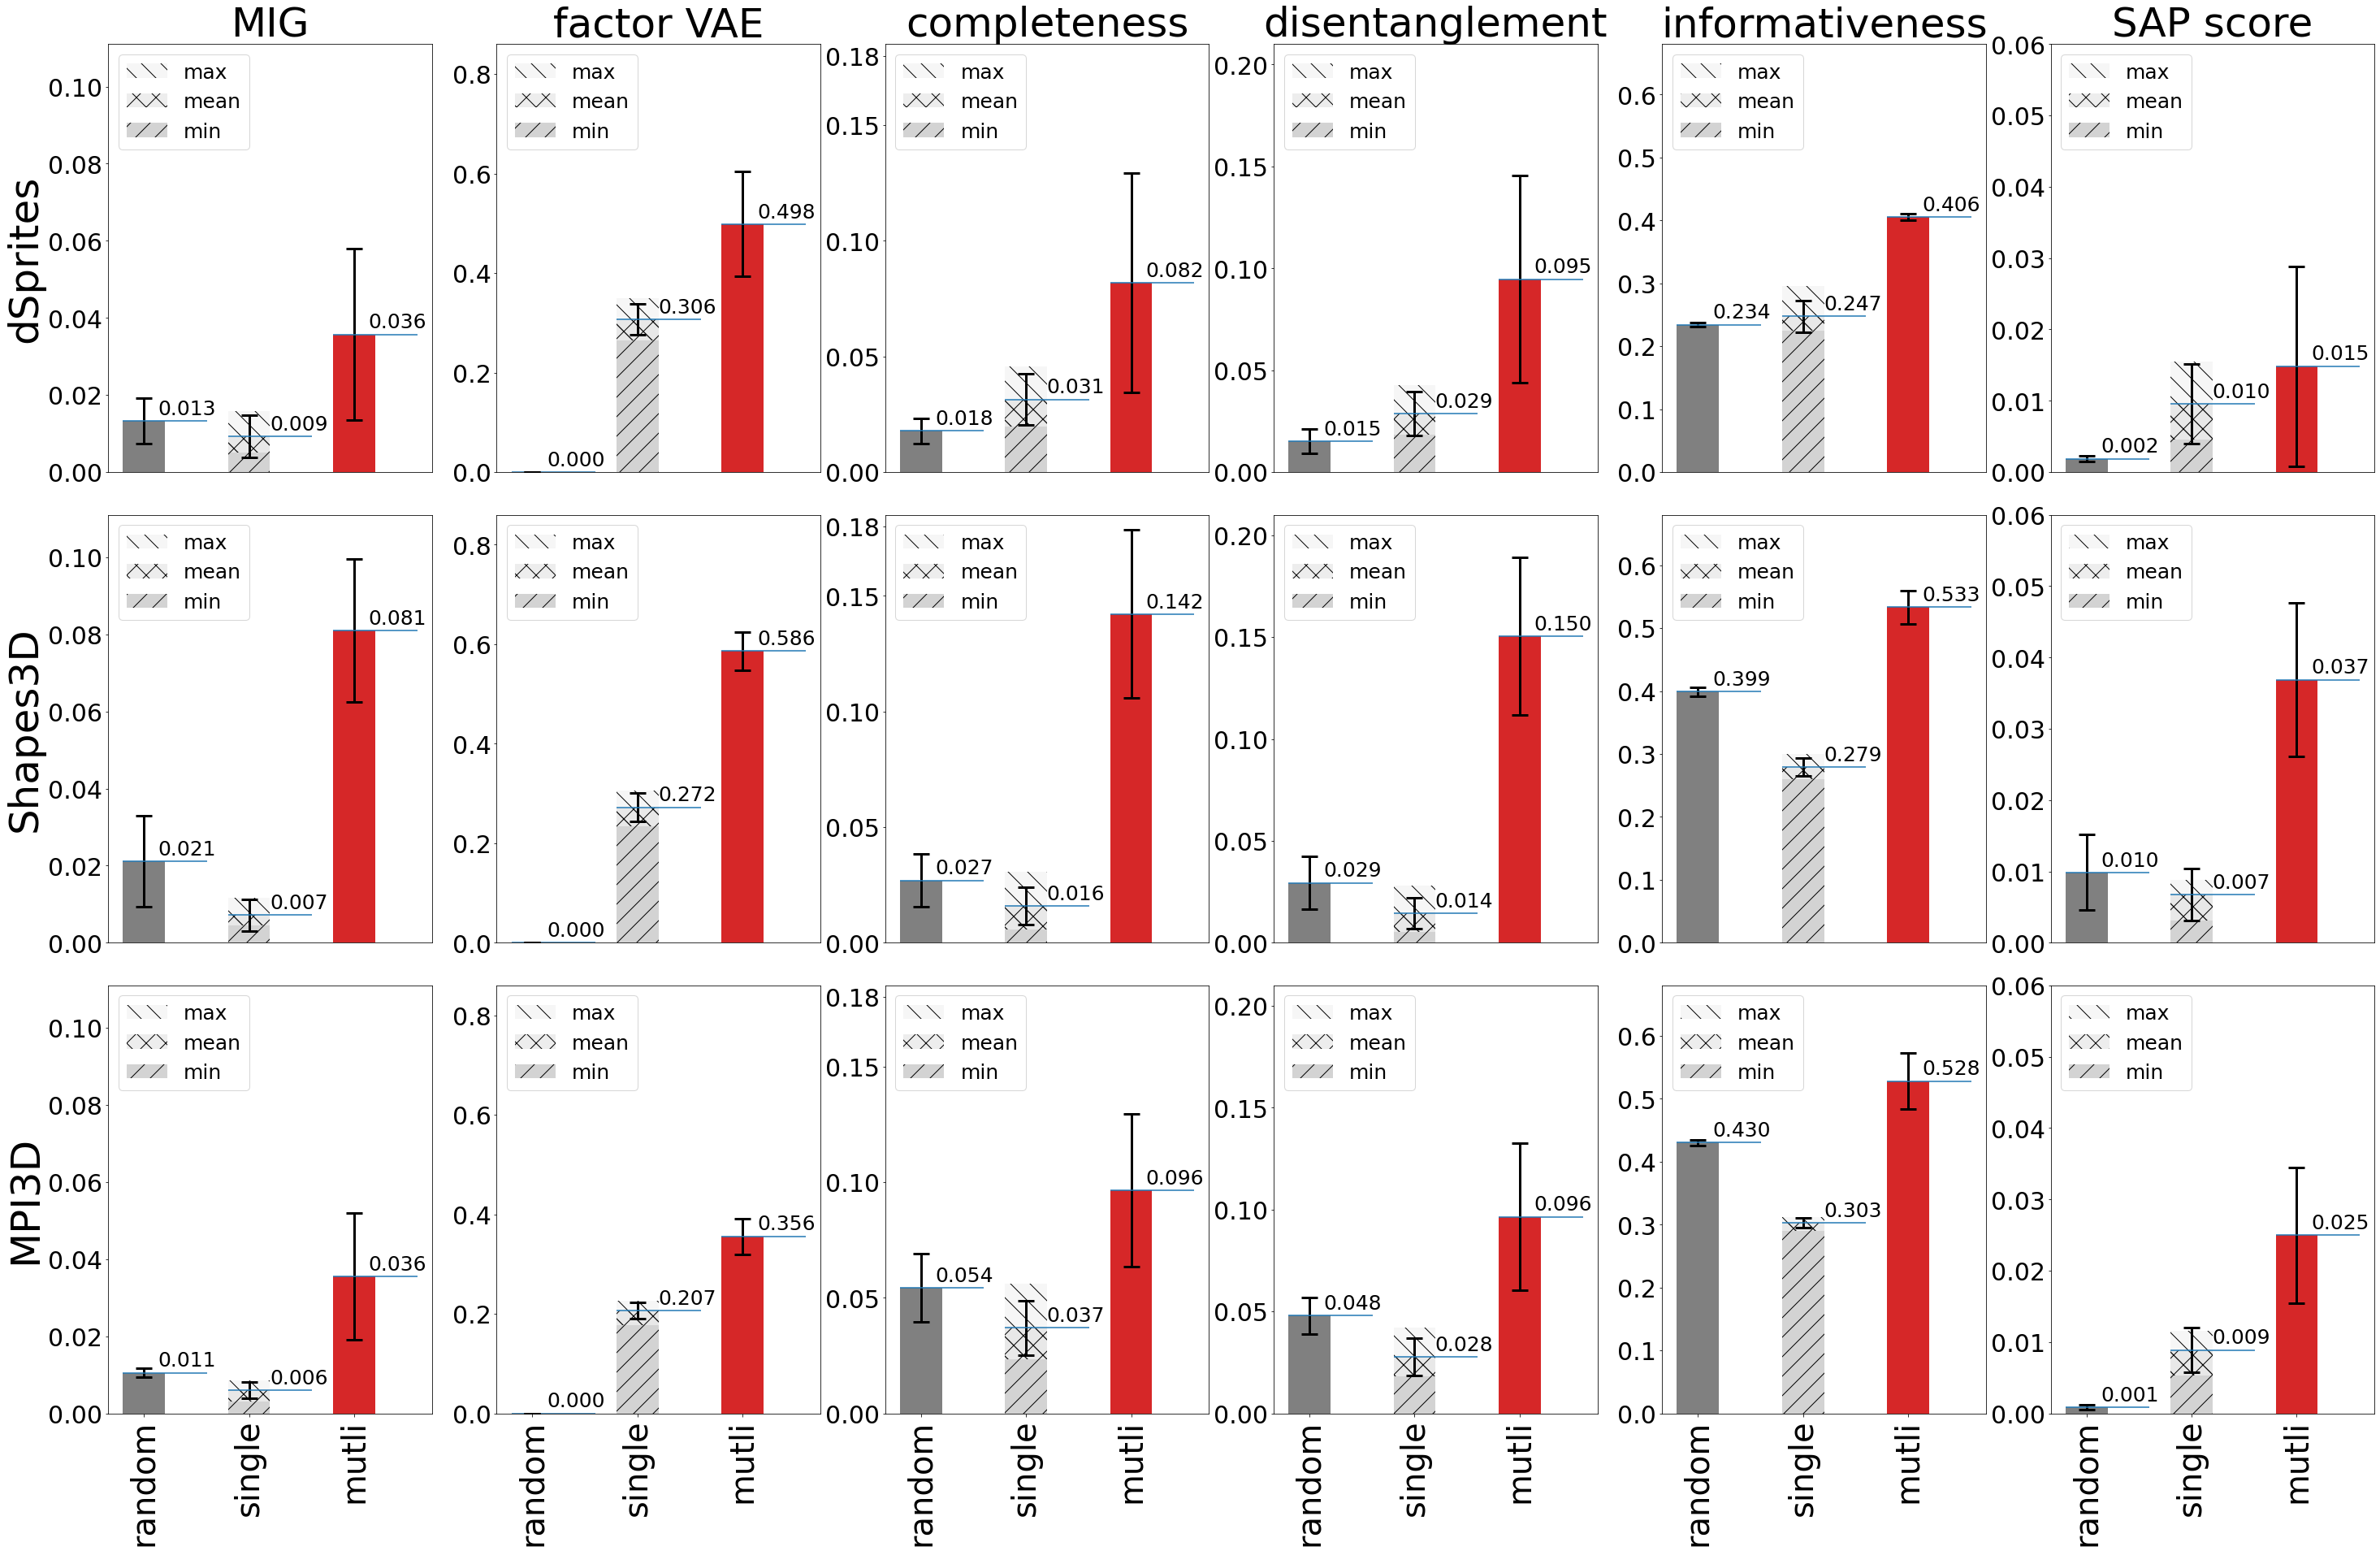

In [102]:
plot_all3(dataLH, dataLH_shapes3d, dataLH_mpi3d, regression=False)

In [662]:
lims = lims={"mig":(0, 0.08), "factor_vae":(0,0.62), "completeness":(0, 0.15), "disentanglement":(0, 0.16), "informativeness_test":(0, 0.58)}

In [113]:
def plot_regression(data1, data2, data3, what="total_loss", lims=None, ax=None, plot_title=True, ylabel=None, plot_xlabels = True, regression=False, plot_anno=False, loc=2, title=None):
    colors=["gray", "lightgray", "tab:red"]


    data_multi1 = data1[data1["task"]=="multi-10"]
    mean_multi1 = data_multi1[what].mean()
    std_multi1 = data_multi1[what].std()

    data_multi2 = data2[data2["task"]=="multi-10"]
    mean_multi2 = data_multi2[what].mean()
    std_multi2 = data_multi2[what].std()

    data_multi3 = data3[data3["task"]=="multi-10"]
    mean_multi3 = data_multi3[what].mean()
    std_multi3 = data_multi3[what].std()

    data_r1 = data1[data1["task"]=="regression"]
    mean_r1 = data_r1[what].mean()
    std_r1 = data_r1[what].std()

    data_r2 = data2[data2["task"]=="regression"]
    mean_r2 = data_r2[what].mean()
    std_r2 = data_r2[what].std()
    
    data_r3 = data3[data3["task"]=="regression"]
    mean_r3 = data_r3[what].mean()
    std_r3 = data_r3[what].std()
    
    xs = np.arange(8)
    
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize=(14,7))
        

    #ax.bar(xs[2], max_multi, color=colors[2], hatch='\\', error_kw = {"capsize":20, "elinewidth":3, "markeredgewidth":3})
    ax.bar(xs[0], mean_multi1, yerr=std_multi1, label="multi-head", color=colors[2], error_kw = {"capsize":10, "elinewidth":3, "markeredgewidth":3})
    ax.bar(xs[1],mean_r1, yerr= std_r1, color="tab:blue", label="one-head", error_kw={"capsize":10, "elinewidth":3, "markeredgewidth":3})
    
    ax.bar(xs[3], mean_multi2, yerr=std_multi1, color=colors[2], error_kw = {"capsize":10, "elinewidth":3, "markeredgewidth":3})
    ax.bar(xs[4],mean_r2, yerr= std_r1, color="tab:blue", error_kw={"capsize":10, "elinewidth":3, "markeredgewidth":3})
    
    ax.bar(xs[6], mean_multi3, yerr=std_multi1, color=colors[2], error_kw = {"capsize":10, "elinewidth":3, "markeredgewidth":3})
    ax.bar(xs[7],mean_r3, yerr= std_r1, color="tab:blue", error_kw={"capsize":10, "elinewidth":3, "markeredgewidth":3})
    
    #ax.bar(xs[4], min_multi, color=colors[2],  hatch='/', error_kw = {"capsize":20, "elinewidth":3, "markeredgewidth":3})
    

    for i, p in enumerate(ax.patches):
        if plot_anno:
        
            w = p.get_width()
            h = p.get_height()
            x = p.get_x()+w/2


            ax.hlines(h, xmin=x-w*0.5, xmax=x+1.5*w )

            ax.annotate('{:.3f}'.format(h),
            xy=(x + 1.5*0.7*w, h),
            xytext=(-1, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom', size=25)


    
   # for i in range(10):
   #     ax.bar(xs[i+1], means[means["idx"]==i+1][what], yerr=stds[stds["idx"]==i+1][what], color=colors[1], label="task {}".format(i+1))
    
   # for j, m in enumerate([5,10,20,30,40,50]):
   #     ax.bar(xs[11+j], means[means["idx"]=="multi-{}".format(m)][what], yerr=stds[stds["idx"]=="multi-{}".format(m)][what], color=colors[2], label="multi-{}".format(m))
    
    if what == "informativeness_test":
        ax.set_ylim((0, 0.55))
        
    if what == "completeness":
        ax.set_yticks([0.0, 0.05, 0.10, 0.15, 0.20])
  
    if what == "disentanglement":
        ax.set_yticks([0.0, 0.05, 0.10, 0.15, 0.20])

    if lims is not None:
        ax.set_ylim(lims[what])

    if plot_xlabels:     
        ax.set_xticks([0.5, 3.5, 6.5])
        labels=["dSprites", "Shapes3D", "MPI3D"]
        ax.set_xticklabels(labels)
     
    else:
        ax.set_xticks([])

    
    if plot_title:
        if title is not None:
            ax.set_title(title, fontsize=50)
        else:
            if what == "total_loss":
                ax.set_title("MSE loss", fontsize=50)
            elif what == "informativeness_test":
                ax.set_title("informativeness", fontsize=50)
            elif what == "factor_vae":
                ax.set_title("factor VAE", fontsize=50)
            elif what == "sap_score":
                ax.set_title("SAP score", fontsize=50)
            elif what == "mig":
                ax.set_title("MIG", fontsize=50)  
            else:
                ax.set_title(what, fontsize=50)
        #ax.set_title(what, fontsize=50)
    ax.tick_params(axis='both', which='major', labelsize=40)
    if ylabel is not None:
        ax.set_ylabel(ylabel, fontsize=50)
    ax.tick_params(axis='x', rotation=90) 

    circ1 = mpatches.Patch(facecolor="red",label='multi-head')
    circ2= mpatches.Patch(facecolor="tab:blue",label='one-head')


    

    ax.legend(prop={'size': 25}, loc=loc)
    
    
def plot_all_regressions(data1, data2, data3, whats=["mig", "factor_vae", "completeness", "disentanglement", "informativeness_test", "sap_score"],
                      lims=None, cols=6, figsize=(60,10), plot_title=True, ylabel=None, plot_xlabels = True, ax=None, row=0):
    
   
    if ax is None:
        fig, ax = plt.subplots(1, cols, figsize=figsize,squeeze=False)
        plt.subplots_adjust(hspace=0.5)

    for j in range(cols):
        if j == 0:
            plot_regression(data1, data2, data3, whats[j], lims=lims, ax= ax[row][j], plot_title=plot_title, ylabel=ylabel, plot_xlabels = plot_xlabels, loc=1)
        else:
            plot_regression(data1, data2, data3, whats[j], lims=lims, ax= ax[row][j], plot_title=plot_title, ylabel=None, plot_xlabels = plot_xlabels, loc=1)


LIMS={"mig":(0, 0.111), "factor_vae":(0,0.86), "completeness":(0, 0.20), "disentanglement":(0, 0.21), "informativeness_test":(0, 0.68), "sap_score":(0, 0.06)}




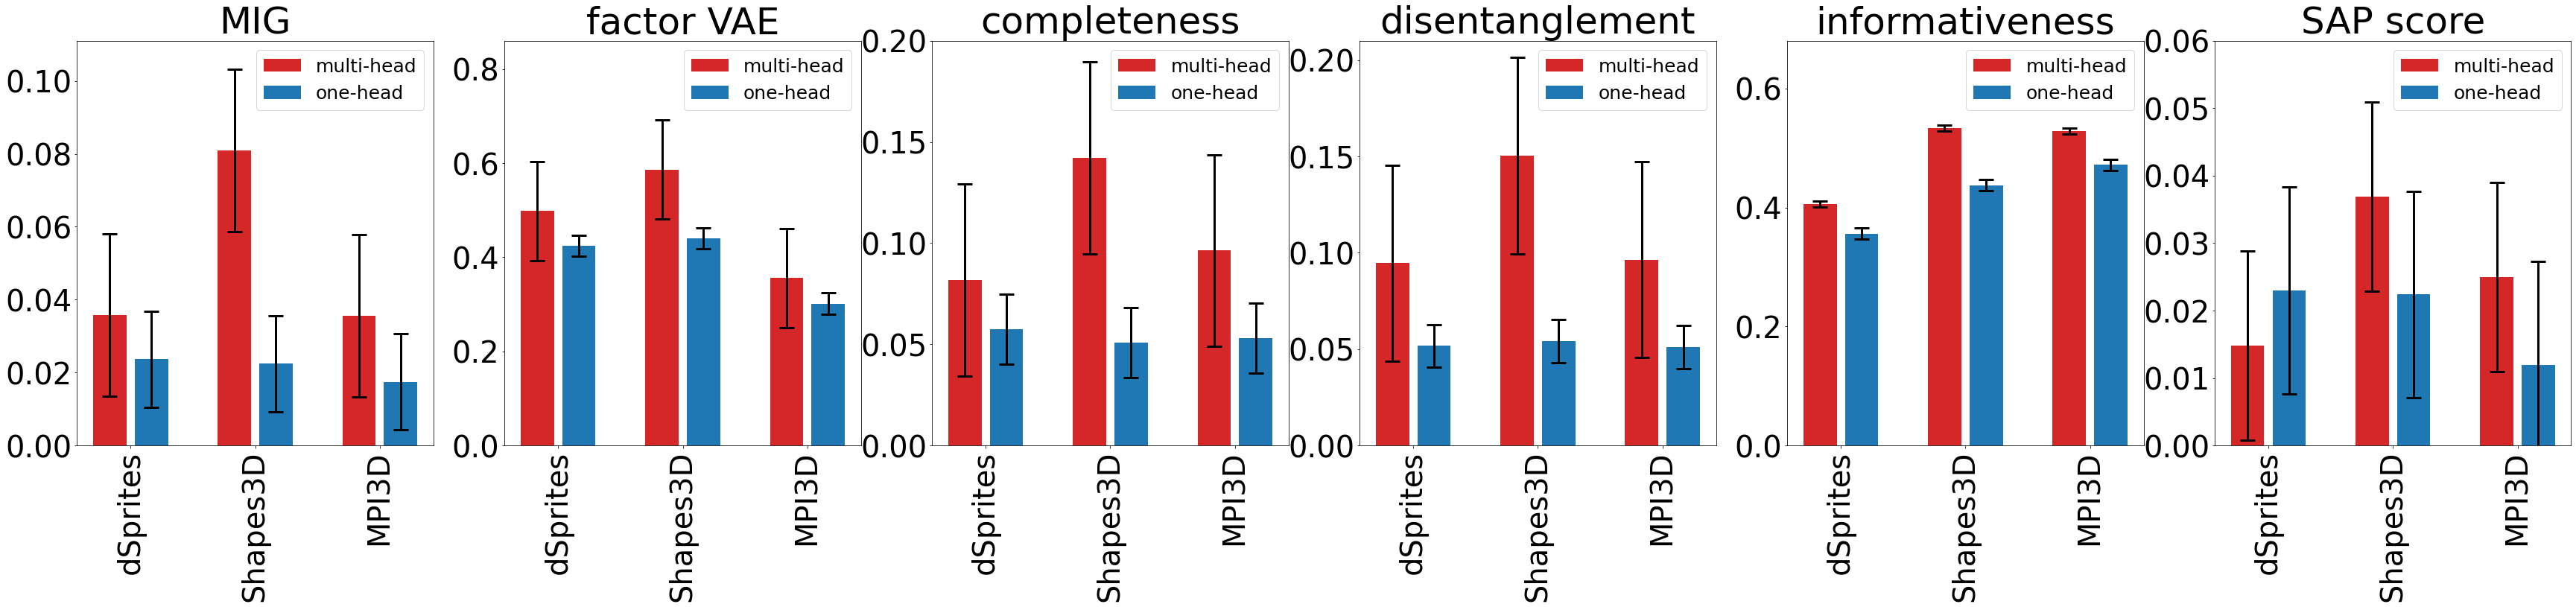

In [114]:
plot_all_regressions(dataLH, dataLH_shapes3d, dataLH_mpi3d, lims=LIMS)

In [257]:
dataLH.columns

Index(['loss0', 'loss1', 'loss2', 'loss3', 'loss4', 'loss5', 'loss6', 'loss7',
       'loss8', 'loss9', 'loss10', 'loss11', 'loss12', 'loss13', 'loss14',
       'loss15', 'loss16', 'loss17', 'loss18', 'loss19', 'loss20', 'loss21',
       'loss22', 'loss23', 'loss24', 'loss25', 'loss26', 'loss27', 'loss28',
       'loss29', 'loss30', 'loss31', 'loss32', 'loss33', 'loss34', 'loss35',
       'loss36', 'loss37', 'loss38', 'loss39', 'loss40', 'loss41', 'loss42',
       'loss43', 'loss44', 'loss45', 'loss46', 'loss47', 'loss48', 'loss49',
       'total_loss', 'factor_vae', 'mig', 'irs', 'wica', 'gauss_TC',
       'gauss_WS', 'MI_score', 'max_corr', 'completeness', 'disentanglement',
       'informativeness_test', 'sap_score', 'task', 'seed'],
      dtype='object')

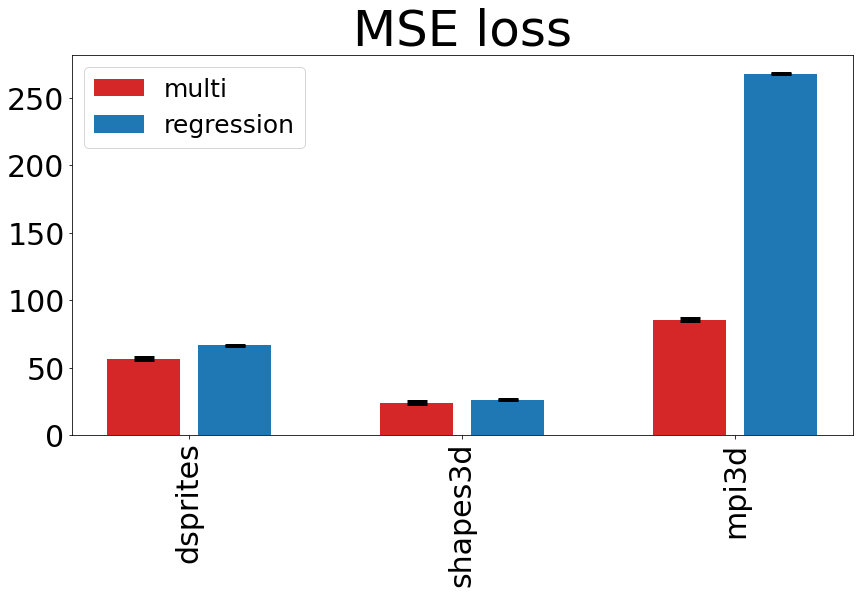

In [261]:
plot_regression(dataLH, dataLH_shapes3d, dataLH_mpi3d, "total_loss")

# UMAP encodings

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
PATH="/home/anowak/results/anowak/disentangelemnt/latenty/"
DATASETS=["dsprites", "shapes3d","mpi3d"]


In [2]:
import umap

In [3]:
def plot_histograms(path, datasets):
    fig, ax = plt.subplots(3*3,8,figsize=(9*3,8*3))
    for i, d in enumerate(datasets):
        datam = np.load(os.path.join(os.path.join(PATH, d), "multi_{}.npy".format(d)))
        datas = np.load(os.path.join(os.path.join(PATH, d), "single_{}.npy".format(d)))
        datar = np.load(os.path.join(os.path.join(PATH, d), "random_{}.npy".format(d)))
        for j in range(8):
            ax[3*i][j].hist(datam[:,j], bins=20)
        for j in range(8):
            ax[3*i+1][j].hist(datas[:,j], bins=20)
        for j in range(8):
            ax[3*i+2][j].hist(datar[:,j], bins=20)
        ax[3*i][0].set_ylabel("multi-{}".format(d))
        ax[3*i+1][0].set_ylabel("single-{}".format(d))
        ax[3*i+2][0].set_ylabel("random-{}".format(d))
    plt.show()
    
def plot_umpas(path, datasets, n_neighbors=15, min_dist=0.5, metric='euclidean' ):
    fig, ax = plt.subplots(3,3,figsize=(10*3,10*3))
    for i, d in enumerate(datasets):
        print("{}/3".format(i))
        datam = np.load(os.path.join(os.path.join(PATH, d), "multi_{}.npy".format(d)))
        datas = np.load(os.path.join(os.path.join(PATH, d), "single_{}.npy".format(d)))
        datar = np.load(os.path.join(os.path.join(PATH, d), "random_{}.npy".format(d)))
        
        umap1 =  umap.UMAP(random_state=123, n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, metric=metric)
        umap2 =  umap.UMAP(random_state=123, n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, metric=metric)
        umap3 =  umap.UMAP(random_state=123, n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, metric=metric)
   
        
        udatam = umap1.fit_transform(datam)
        udatas = umap2.fit_transform(datas)
        udatar = umap3.fit_transform(datar)
        
        
        datam = np.save(os.path.join(os.path.join(PATH, d), "umap_multi_{}_n{}_m{}.npy".format(d, n_neighbors, min_dist*100)),udatam)
        datas = np.save(os.path.join(os.path.join(PATH, d), "umap_single_{}_n{}_m{}.npy".format(d, n_neighbors, min_dist*100)),udatas)
        datar = np.save(os.path.join(os.path.join(PATH, d), "umap_random_{}_n{}_m{}.npy".format(d, n_neighbors, min_dist*100)),udatar)     

        ax[i][0].scatter(udatam[:,0], udatam[:,1], alpha=0.5)
      
        ax[i][1].scatter(udatas[:,0], udatas[:,1], alpha=0.5)
       
        ax[i][2].scatter(udatar[:,0], udatar[:,1], alpha=0.5)
        
        ax[i][0].set_title("multi-{}".format(d))
        ax[i][1].set_title("single-{}".format(d))
        ax[i][2].set_title("random-{}".format(d))
    plt.show() 

def plot_load_umaps(path, datasets ):

    
   
    for i, d in enumerate(datasets):
        fig, ax = plt.subplots(3,6,figsize=(20,10))
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.0)
        test_loader = get_dataloader("{}_multitask".format(d), "../data", 256, 123, 64,
                                          split="test", test_prec=0.125, val_prec=0.125,
                                          num_workers=4, pin_memory=False, n_task_headers = 10)
        dataset = test_loader.dataset

        print("{}/3".format(i))
        udatam = np.load(os.path.join(os.path.join(PATH, d), "umap_multi_{}.npy".format(d)))
        udatas = np.load(os.path.join(os.path.join(PATH, d), "umap_single_{}.npy".format(d)))
        udatar = np.load(os.path.join(os.path.join(PATH, d), "umap_random_{}.npy".format(d)))

        
       

        
        fdsprites = {0:"color", 1:"shape", 2:"scale", 3:"orientation",4:"position x", 5:"position y"}
        fshapes3d = {0:"floor hue", 1:"wall hue", 2:"object hue", 3:"scale", 4:"shape", 5:"orientation"}
        fmpi3d = {0:"object hue", 1:"object shape", 2:"object size", 3:"camera height", 4:"background", 5:"horizontal axis"}
        
        FDIC={"dsprites":fdsprites, "shapes3d":fshapes3d, "mpi3d":fmpi3d}
        
        for j in range(6):

            ax[0][j].scatter(udatam[:,0], udatam[:,1], alpha=0.5, s=8, c=dataset.ground_true[:,j], cmap="RdBu")

            ax[1][j].scatter(udatas[:,0], udatas[:,1], alpha=0.5, s=8, c=dataset.ground_true[:,j], cmap="RdBu")

            ax[2][j].scatter(udatar[:,0], udatar[:,1], alpha=0.5, s=8, c=dataset.ground_true[:,j], cmap="RdBu")

            ax[0][j].set_title(FDIC[d][j], fontsize=20)
            
            if j>0:
                ax[0][j].set_yticks([])
                ax[1][j].set_yticks([])
                
                ax[2][j].set_yticks([])
            
            ax[0][j].set_xticks([])
            ax[1][j].set_xticks([])

            if j==0:
                ax[0][j].set_ylabel("multi-task".format(d), fontsize=20)
                ax[1][j].set_ylabel("single-task".format(d), fontsize=20)
                ax[2][j].set_ylabel("random".format(d), fontsize=20)

        plt.show()       
 

def plot_umap_multi(path, datasets ):

    
    fig, ax = plt.subplots(3,6,figsize=(20,10))
    for i, d in enumerate(datasets):
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.0)
        test_loader = get_dataloader("{}_multitask".format(d), "../data", 256, 123, 64,
                                          split="test", test_prec=0.125, val_prec=0.125,
                                          num_workers=4, pin_memory=False, n_task_headers = 10)
        dataset = test_loader.dataset

        print("{}/3".format(i))
        udatam = np.load(os.path.join(os.path.join(PATH, d), "umap_multi_{}.npy".format(d)))
        udatas = np.load(os.path.join(os.path.join(PATH, d), "umap_single_{}.npy".format(d)))
        udatar = np.load(os.path.join(os.path.join(PATH, d), "umap_random_{}.npy".format(d)))

        for j in range(6):
            ax[i][j].scatter(udatam[:,0], udatam[:,1], alpha=0.5, c=dataset.ground_true[:,j], s=10, cmap="RdBu")
            ax[0][j].set_title("factor {}".format(j))

            if j==0:
                ax[i][j].set_ylabel("multi-{}".format(d), fontsize=20)
                #abx[2][j].set_ylabel("random-{}".format(d), fontsize=20)

    plt.show()       
   
       

In [4]:
plt.rcParams['lines.markersize']

6.0

In [6]:
import importlib
import sys
sys.path.append("/home/anowak/projects/disentanglement-multi-task")

In [7]:
from common.data_loader import get_dataloader

0/3


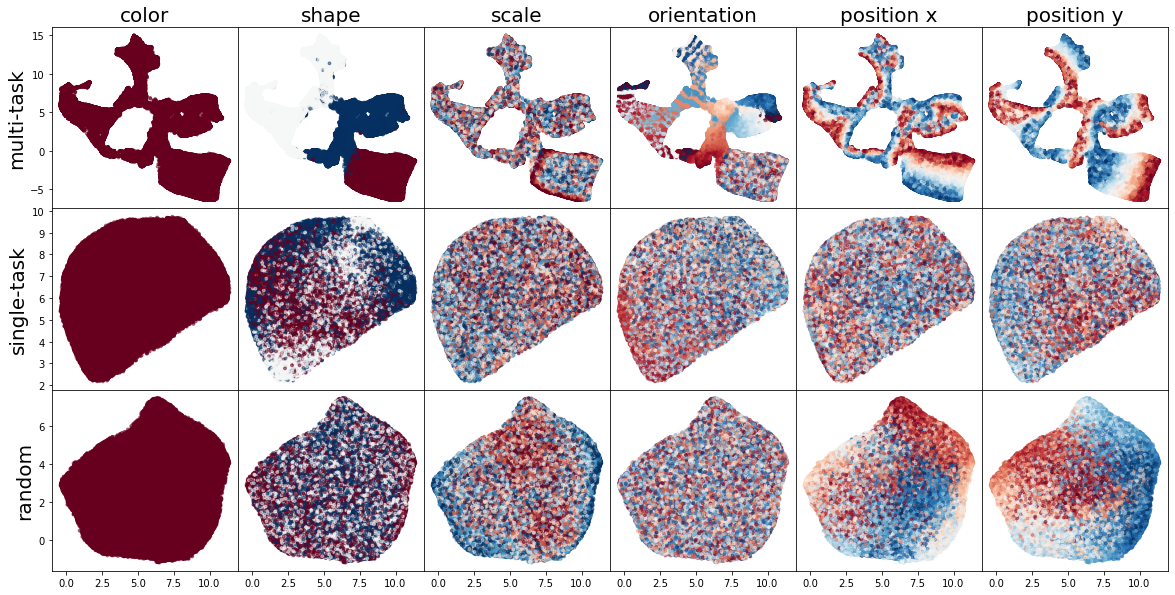

1/3


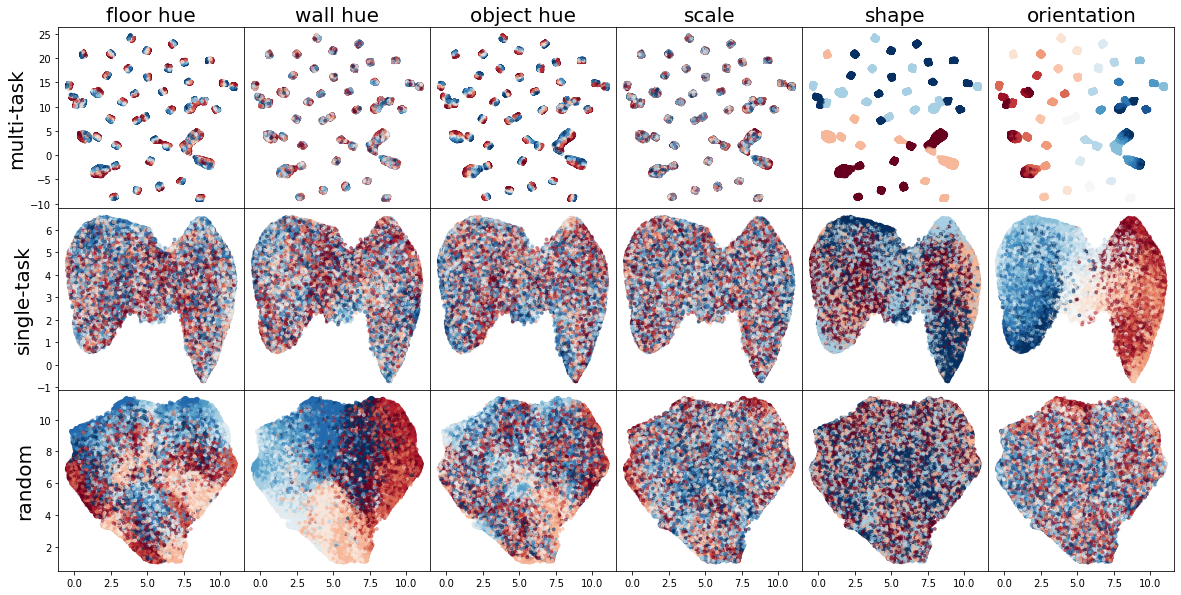

2/3


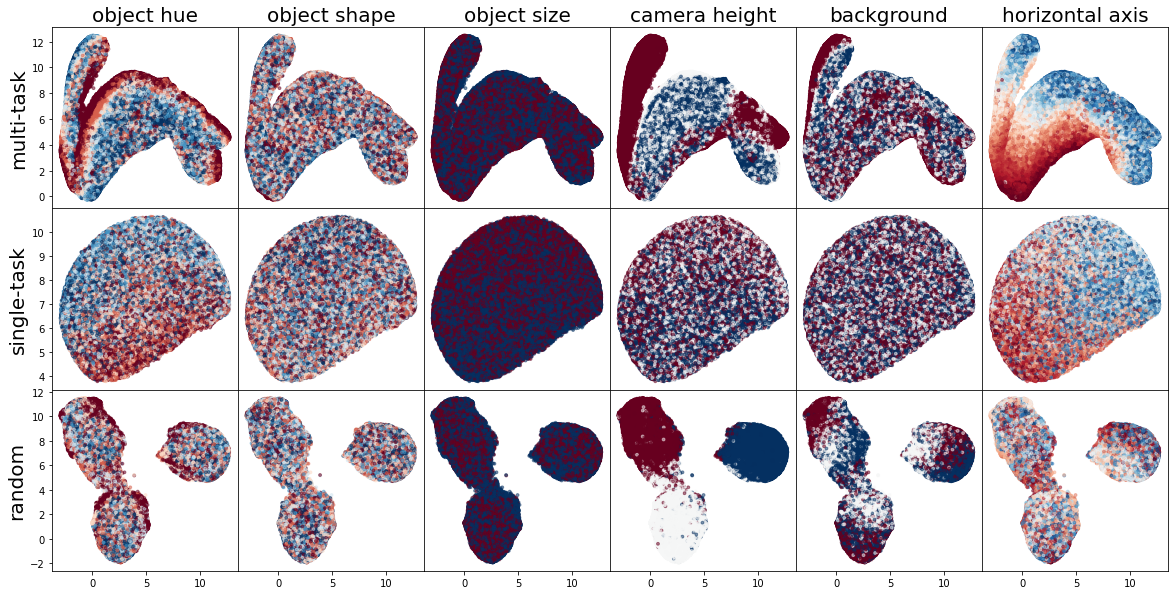

In [8]:
plot_load_umaps(PATH,DATASETS)

0/3
1/3
2/3


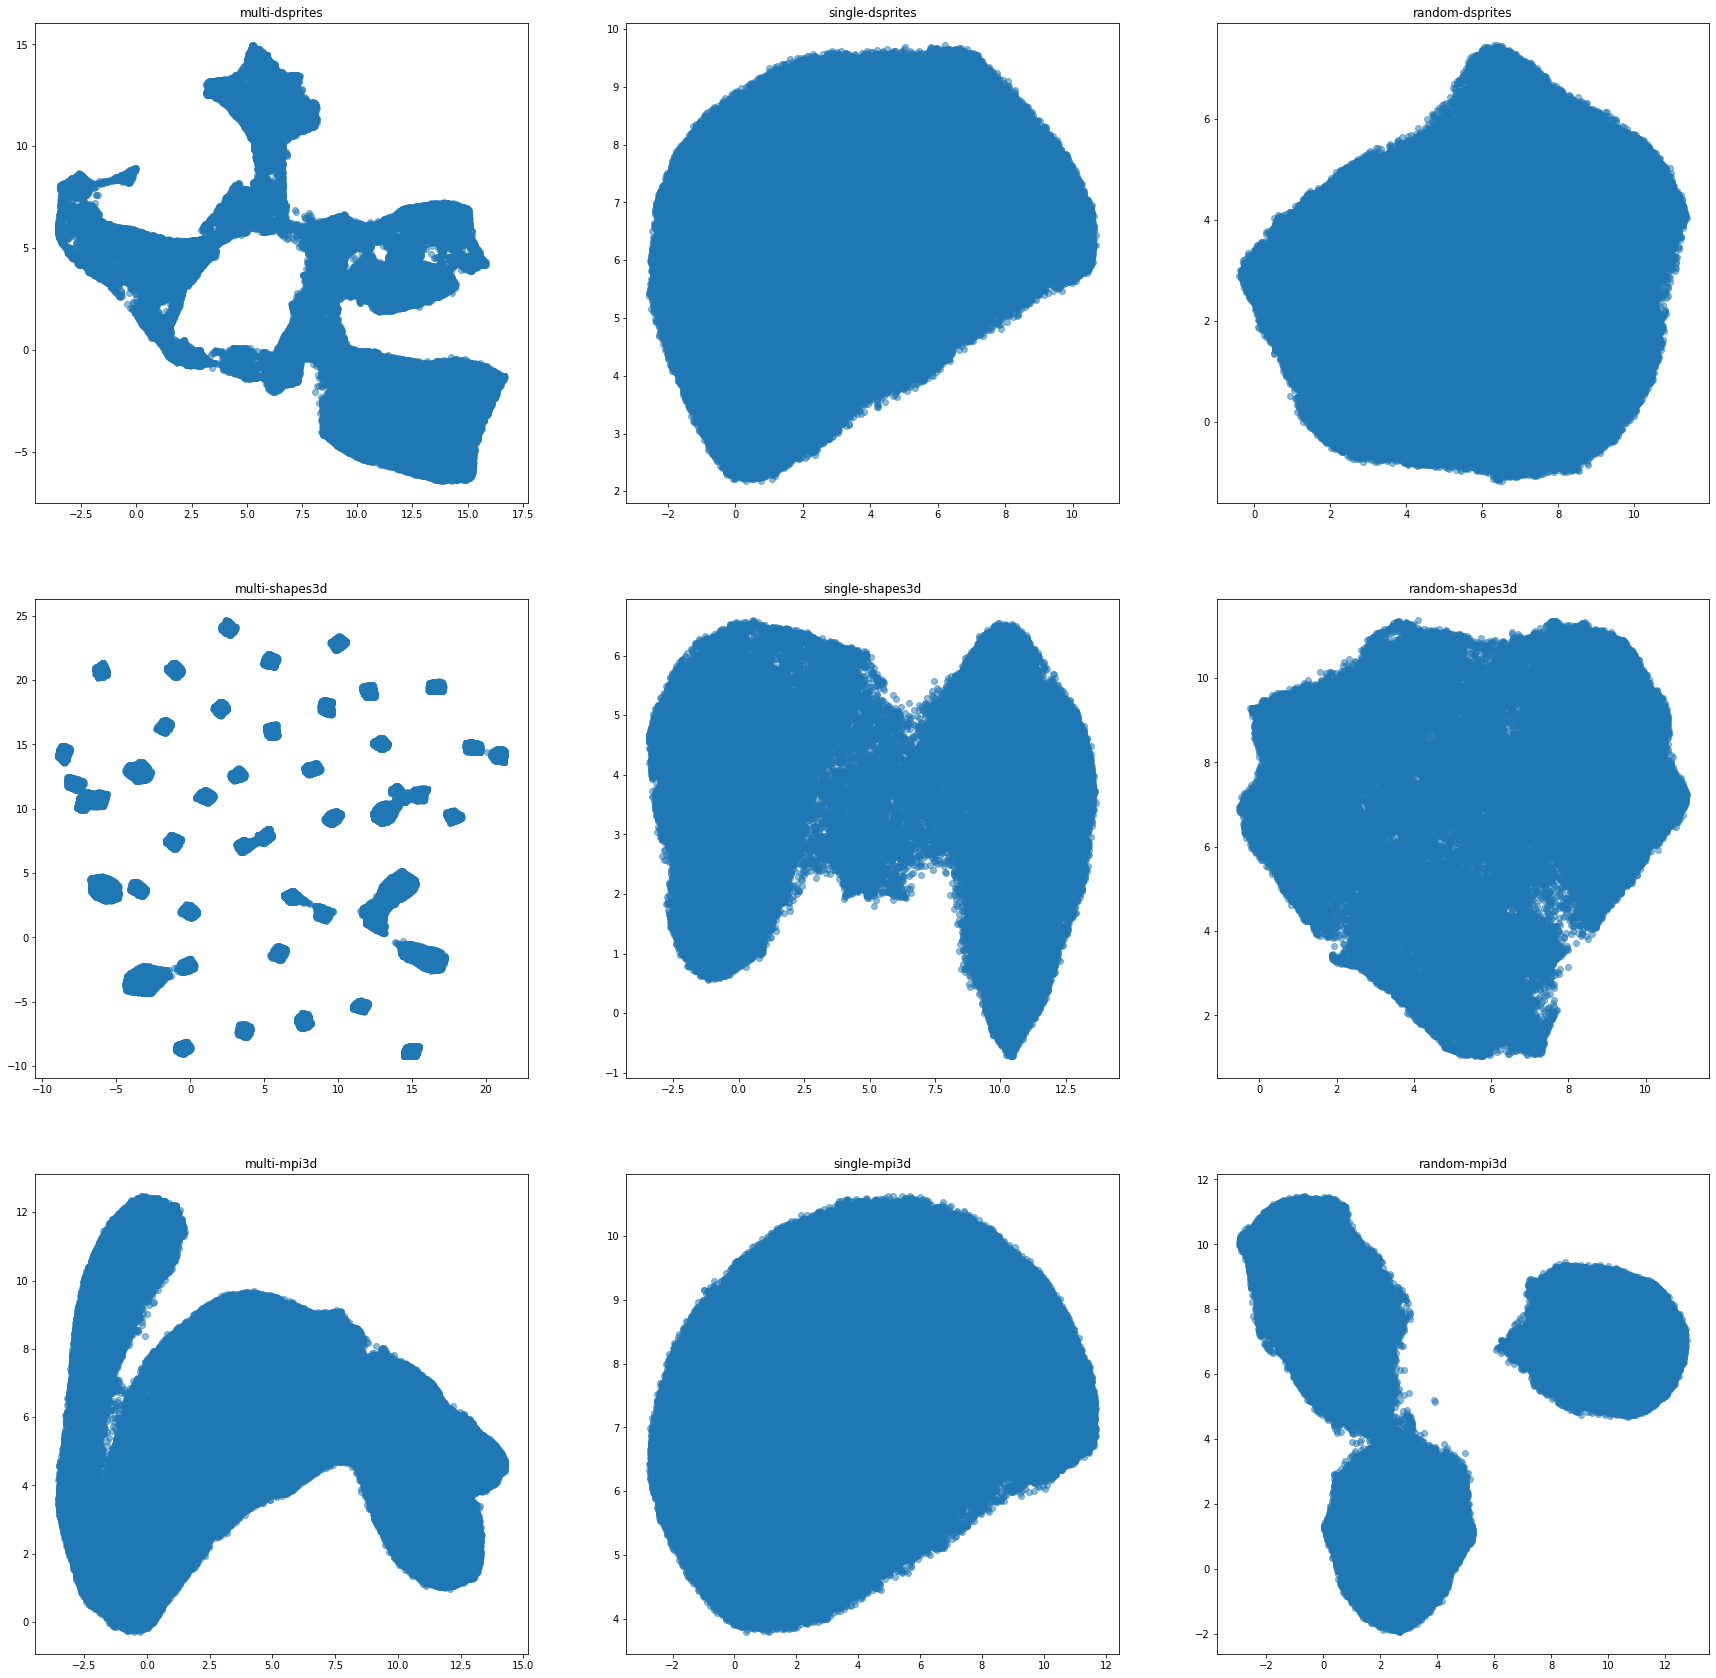

In [10]:
plot_umpas(PATH,DATASETS, n_neighbors=100, min_dist=0.1)

0/3
1/3
2/3


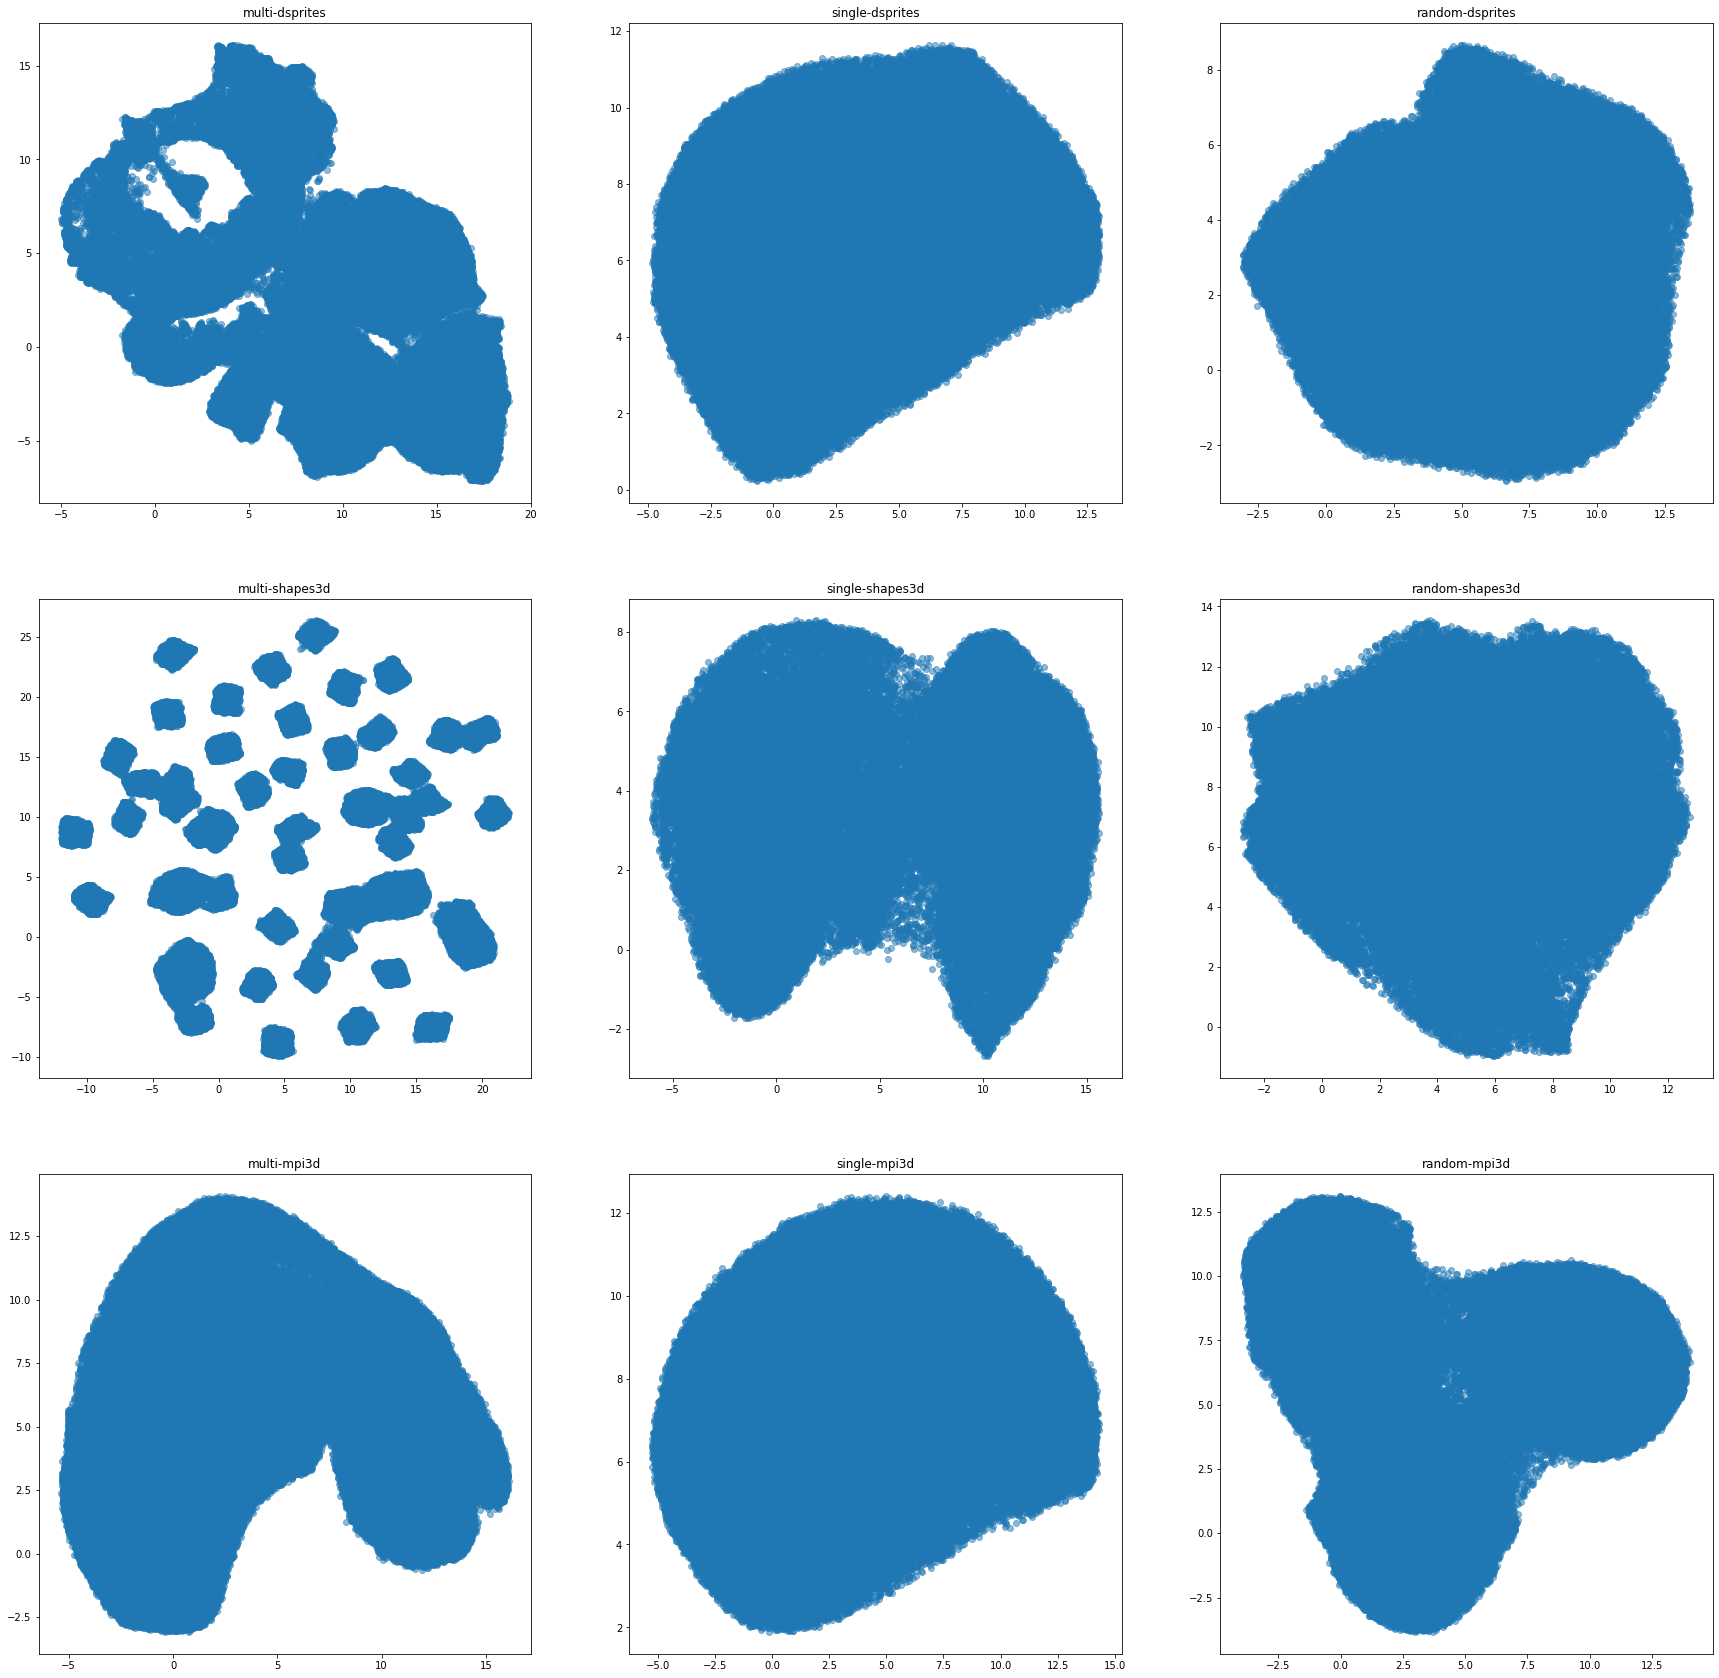

In [9]:
plot_umpas(PATH,DATASETS, n_neighbors=100, min_dist=0.5)

In [ ]:
plot_umpas(PATH,DATASETS, n_neighbors=100, min_dist=0.5)

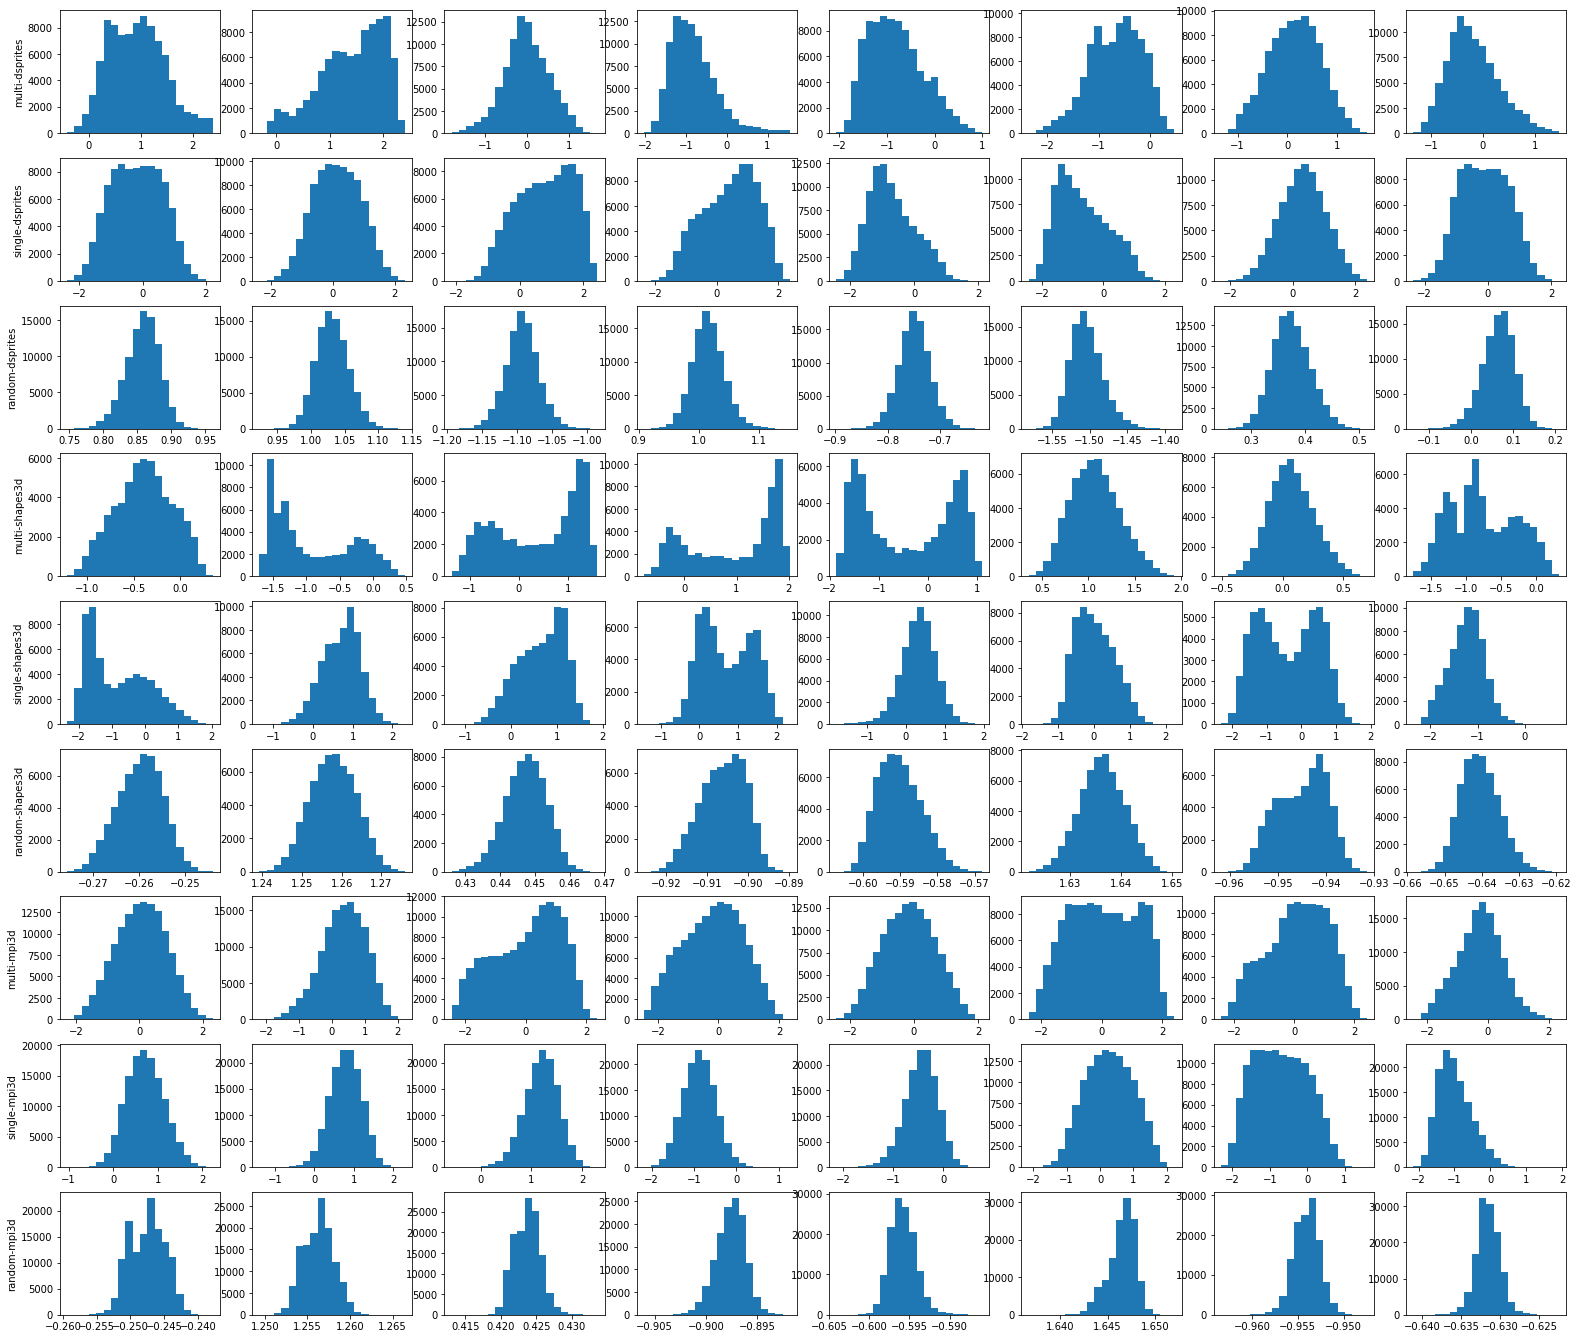

In [11]:
plot_histograms(PATH,DATASETS)